In [4]:
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

np.random.seed(123)

In [5]:
# input_path_dir= 'C:/ZhangLI/Codes/DataSet/kdd-cup/'
input_path_dir= 'E:/Dataset/kdd/'
file_name= 'sdwpf_baidukddcup2022_full.csv'
ori_data = pd.read_csv(f'{input_path_dir}{file_name}')

In [6]:
def describe_train(train):
    print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
    print('-' * 50)
    # 查看哪些列具有缺失值
    print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')
    print(f'The train missing column: {train.columns[train.isna().any()].tolist()}.')
    for i in train.columns[train.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {round((train[i].isna().sum() / train.shape[0])*100, 2)}%')
  
    # 查看数据值唯一的列
    one_value_cols = []
    one_value_cols += [col for col in train.columns if train[col].nunique() <= 1]

    print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
    print(f'{one_value_cols} of unique values in the train set')
    print('-' * 50)
    # 查看数据缺失值情况
    nan_cols = [col for col in train.columns if train[col].isna().sum() / train.shape[0] > 0.90]
    print(f'There are {len(nan_cols)} columns in train dataset with [na value > 0.9].')
    print(f'The columns name is {nan_cols}')
    print('-' * 50)
    # 列类型
    numerical_col = list(train.select_dtypes(exclude=['object']).columns)
    category_col = list(filter(lambda x: x not in numerical_col,list(train.columns)))
    print(f'The numerical columns is: {numerical_col}')
    print(f'The category columns is: {category_col}')
    return one_value_cols + nan_cols
describe_train(ori_data)

Train dataset has 3550464 rows and 13 columns.
--------------------------------------------------
There are 10 columns in train dataset with missing values.
The train missing column: ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'].
The missing rate of 'Wspd' is 1.26%
The missing rate of 'Wdir' is 1.26%
The missing rate of 'Etmp' is 1.26%
The missing rate of 'Itmp' is 1.26%
The missing rate of 'Ndir' is 1.26%
The missing rate of 'Pab1' is 1.26%
The missing rate of 'Pab2' is 1.26%
The missing rate of 'Pab3' is 1.26%
The missing rate of 'Prtv' is 1.26%
The missing rate of 'Patv' is 1.26%
There are 0 columns in train dataset with one unique value.
[] of unique values in the train set
--------------------------------------------------
There are 0 columns in train dataset with [na value > 0.9].
The columns name is []
--------------------------------------------------
The numerical columns is: ['TurbID', 'Day', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', '

[]

In [7]:
ori_data

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,12.23,-0.83,29.08,41.90,-23.73,1.07,1.07,1.07,-0.21,1549.53
1,1,1,00:10,11.58,-3.32,29.01,42.01,-23.70,1.06,1.06,1.06,-0.25,1549.71
2,1,1,00:20,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77
3,1,1,00:30,10.84,0.06,29.46,42.43,-31.39,1.03,1.03,1.03,-0.25,1508.20
4,1,1,00:40,11.03,2.03,29.82,42.77,-31.39,1.03,1.03,1.03,-66.01,1517.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550459,134,184,23:10,2.36,-74.19,7.30,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550460,134,184,23:20,1.72,-67.92,7.21,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550461,134,184,23:30,1.46,-59.15,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550462,134,184,23:40,1.31,-64.11,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30


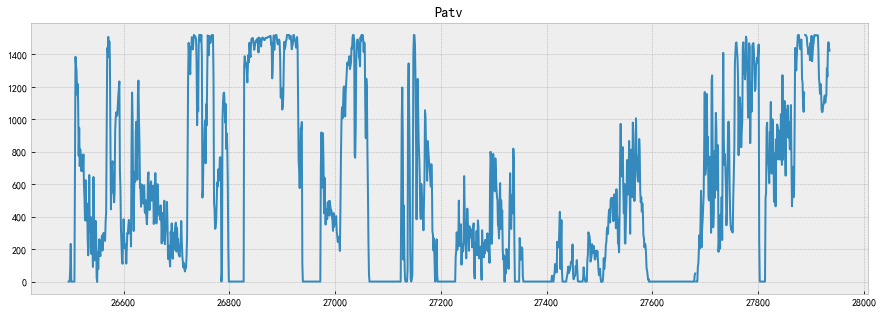

In [8]:
6*24*10
# ori_data[ori_data['TurbID'] == 1]['Patv'][0:6*24*10].plot(figsize=(15, 5), color=next(color_cycle), title='Patv')
ori_data[ori_data['TurbID'] == 2]['Patv'][0:6*24*10].plot(figsize=(15, 5), color=next(color_cycle), title='Patv')

从可视化上看，更像是随机序列
对于平稳性序列，自相关系数往往会迅速退化到0，      对于非平稳性序列，退化会发生得更慢，或存在先减后增或者周期性的波动等变动
The mean of data is: 949.16, The var of data is: 295458.37
The mean of data is: 396.74, The var of data is: 275137.44
The mean of data is: 832.87, The var of data is: 350653.26
The mean of data is: 679.65, The var of data is: 48707.14
The mean of data is: 347.2, The var of data is: 27683.33
从数据上看，均值和方差差的有些多，这一看就是非平稳的


ModuleNotFoundError: No module named 'arch'

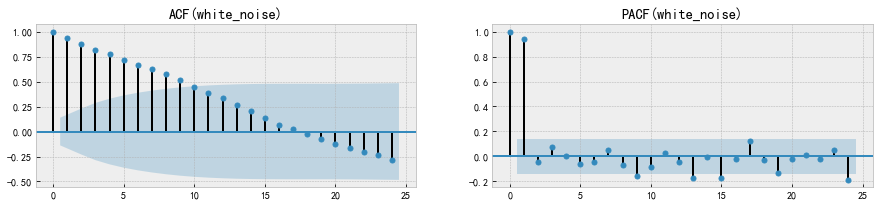

In [9]:
# 平稳性检验
# 1、可视化[看不出来]
print('从可视化上看，更像是随机序列')
# 2、ACF PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# subplots(1,2)使用ax[0] ax[1]  
# subplots(2,2)使用ax[0][0] ax[0][1]两位 
data = ori_data[ori_data['TurbID'] == 1]['Patv'][0:200]
fig, ax = plt.subplots(1, 2, figsize=(15,3))
fig.subplots_adjust(hspace=0.5)

plot_acf(data, ax=ax[0])
ax[0].set_title('ACF(white_noise)')
plot_pacf(data, ax=ax[1])
ax[1].set_title('PACF(white_noise)')
print('对于平稳性序列，自相关系数往往会迅速退化到0，\
      对于非平稳性序列，退化会发生得更慢，或存在先减后增或者周期性的波动等变动')
# 3、均值 方差
k = 5
n = int(len(data) / k)
for i in range(k):
    # print(data[n*i:n*(i+1)])
    avg = np.mean(data[i*n:n*(i+1)])
    var = np.var(data[i*n:n*(i+1)])
    print(f'The mean of data is: {round(avg,2)}, The var of data is: {round(var,2)}',)
print('从数据上看，均值和方差差的有些多，这一看就是非平稳的')
# 4、单位根检验
import numpy as np
from arch.unitroot import ADF
adf = ADF(data)
print(adf.summary().as_text())

from arch.unitroot import PhillipsPerron
from arch.unitroot import DFGLS
from arch.unitroot import KPSS


# res = adfuller(data)
# print('p value:', res)
# data

In [20]:
data

0        1549.53
1        1549.71
2        1534.77
3        1508.20
4        1517.76
          ...   
26491      -0.30
26492      -0.30
26493      -0.30
26494      -0.30
26495      -0.30
Name: Patv, Length: 26496, dtype: float64

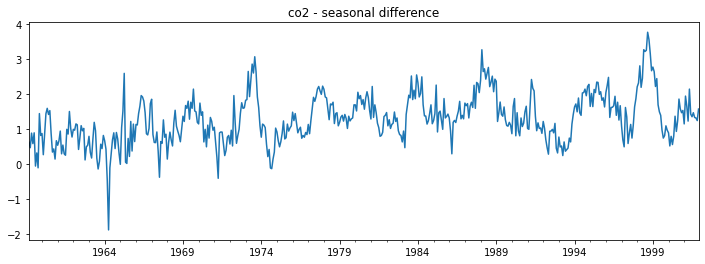

p value: 0.0007785393674428758


In [21]:
# # 一阶差分
data_diff1 = data.diff().dropna()
# # 二阶差分
data_diff2 = data_diff1.diff().dropna()

# 季节差分
data_diff = data.diff(12).dropna()

data_diff.plot(figsize=(12,4))
plt.title('co2 - seasonal difference')
plt.show()

# # ADF检验
res = adfuller(data_diff)
print('p value:', res[1])

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox
res = acorr_ljungbox(data, lags=[6,12,24], return_df=True)
print(res)

         lb_stat  lb_pvalue
6    2984.989584        0.0
12   5824.537707        0.0
24  11004.897263        0.0


In [27]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import arma_order_select_ic
bic_min_order = arma_order_select_ic(data_diff, max_ar=6, max_ma=4, ic='bic')['bic_min_order']
print(bic_min_order)

(6, 3)


In [28]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data_diff, order=bic_min_order).fit(disp=-1)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                    co2   No. Observations:                  514
Model:                     ARMA(6, 3)   Log Likelihood                -236.970
Method:                       css-mle   S.D. of innovations              0.381
Date:                Wed, 19 Jan 2022   AIC                            495.940
Time:                        16:54:12   BIC                            542.605
Sample:                    03-31-1959   HQIC                           514.230
                         - 12-31-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2966      0.108     12.035      0.000       1.085       1.508
ar.L1.co2      1.2555      0.050     24.932      0.000       1.157       1.354
ar.L2.co2      0.4545      0.070      6.510      0.0